# Example of Simulated Annealing use

Recall the definition of the Ising Hamiltonian (used as the cost function):
$$H = A\left(\sum_{i=1}^{N}n_is_i\right)^2$$
Where A = 1 is a parameter, $n_i$ is one number of the set and $s_i = \pm 1$ is the spin associated to each number, associating the number to one subset or the other.
Also recall the definition of the Metropolis criterion:
$$m = e^{-\frac{\Delta E}{T}}$$
Where $\Delta E$ is the difference between the candidate and the current energy. The criterion is compared to a random probability $0 < s < 1$. If $s<w$, the candidate partition is accepted.

We import the useful libraries, our own functions and we define one useful constant.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from SA_toolbox import *

MAX_ITER = 10000

We create a random number set that has a known global minimum of $E = 0$. It will be used to generate plots for different cooling schemes and for variable parameters.

## Simple results
Let's start by showing a few simulation results for different size of number sets. We operate for the same min and max values for the numbers, it should not impact our results. 

Elapsed time 0 mins and 0 seconds for size 2e+01
Elapsed time 0 mins and 0 seconds for size 2e+02
Elapsed time 0 mins and 0 seconds for size 2e+03
Elapsed time 0 mins and 0 seconds for size 2e+04
Elapsed time 0 mins and 4 seconds for size 2e+05


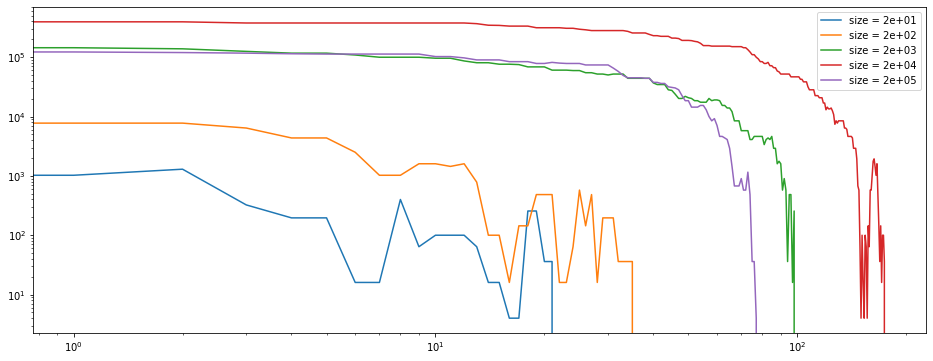

In [2]:
import time

temperature_init = 1000
k = 0.001
cooling_scheme = 'T0/(1+t)'
size_values = np.logspace(1, 5, 5)

plt.figure(figsize=(16,6))
for size in size_values:
    number_set = list(np.random.randint(low=1,high=10,size=int(size)))
    number_set += number_set
    
    start = time.time()
    
    current_partition = init_random_candidate(len(number_set))
    energy_list = []
    record_energy(compute_energy(number_set, current_partition), energy_list)
    current_partition = simulate_loop_annealing(number_set, MAX_ITER, temperature_init, cooling_scheme, k, current_partition, energy_list)

    end = time.time()
    print(f'Elapsed time {int((end - start)/60)} mins and {int(end - start)%60} seconds for size {2*size:.0e}')
    
    plt.semilogy(range(len(energy_list)), energy_list, label=f'size = {2*size:.0e}')
    plt.xscale('log')
    plt.yscale('log')
plt.xlabel('Size of the set', fontsize=13)
plt.ylabel('Step', fontsize=13)
plt.title('Number of steps to convergence vs size of the set (1/t cooling)', 
          fontsize=16)
plt.legend()
plt.show()

Quite naturally, the bigger the set is, the longer it takes our program to converge to the zero value. The oscillations come from the randomness acceptance of the candidate partition introduced by the metropolis cirterion.

We can note that for the 5 random sets introduced here all converge toward the expected minimum.

We now plot the number of steps for convergence as a function of the set size. We choose to keep the min and max values inside the set constant so we don't have several effect occuring at the same time.

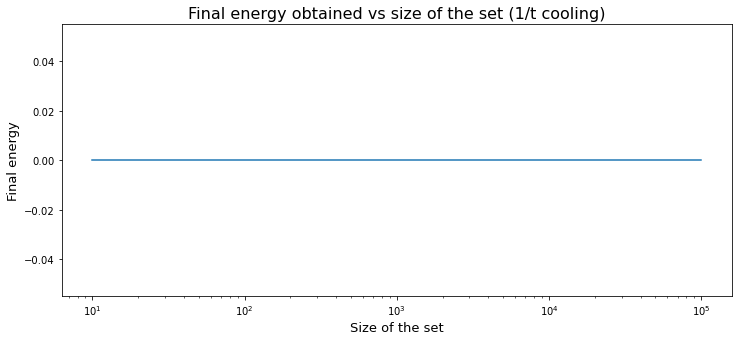

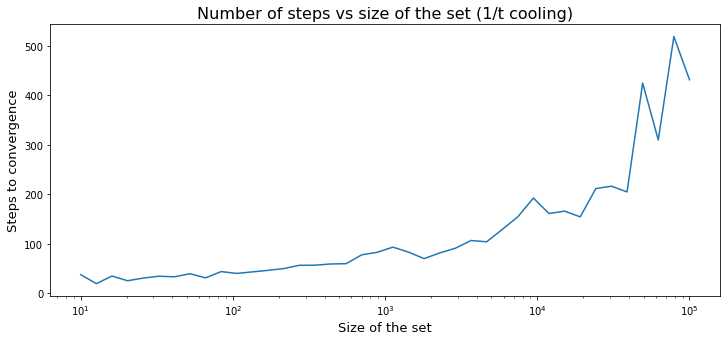

In [3]:
temperature_init = 1000
k = 0.001
n_repeat = 20
cooling_scheme = 'T0/(1+t)'
size_values = np.logspace(1, 5, 20)
convergence_step = list(np.zeros(n_repeat))
convergence_energy = list(np.zeros(n_repeat))
step_list_size = []
energy_list_size = []

for size in size_values:
    number_set = list(np.random.randint(low=1,high=10,size=int(size)))
    number_set += number_set
    for j in range(n_repeat):
        current_partition = init_random_candidate(len(number_set))
        energy_list = []
        record_energy(compute_energy(number_set, current_partition), energy_list)
        current_partition = simulate_loop_annealing(number_set, MAX_ITER, temperature_init, cooling_scheme, k, current_partition, energy_list)

        convergence_step[j] = len(energy_list)
        convergence_energy[j] = energy_list[-1]
    step_list_size.append(np.mean(convergence_step))
    energy_list_size.append(np.mean(convergence_energy))
    
plt.figure(figsize=(12,5))
plt.semilogx(size_values, energy_list_size)
plt.xlabel('Size of the set', fontsize=13)
plt.ylabel('Final energy', fontsize=13)
plt.title('Final energy obtained vs size of the set (1/t cooling)', 
          fontsize=16)
plt.show()

plt.figure(figsize=(12,5))
plt.semilogx(size_values, step_list_size)
plt.xlabel('Size of the set', fontsize=13)
plt.ylabel('Steps to convergence', fontsize=13)
plt.title('Number of steps vs size of the set (1/t cooling)', 
          fontsize=16)
plt.show()

We observe convergence to the right result for any set size, however, as the set size increases, the computing time gets longer.

Another nice thing to notice is the variation of convergence when changing the lower bound for the numbers in the set. This is what we'll show now.

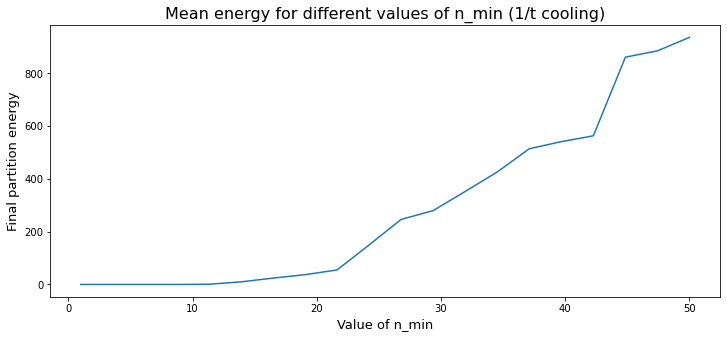

In [4]:
temperature_init = 1000
n_repeat = 20
k = 0.001
cooling_scheme = 'T0/(1+t)'
convergence_step = list(np.zeros(n_repeat))
convergence_energy = list(np.zeros(n_repeat))

n_step_list = []
n_energy_list = []
n_min_values = np.linspace(1, 50, 40)

for n_min in n_min_values:
    number_set = list(np.random.randint(low=n_min,high=100,size=200))
    number_set += number_set
    for j in range(n_repeat):
        current_partition = init_random_candidate(len(number_set))
        energy_list = []
        record_energy(compute_energy(number_set, current_partition), 
                      energy_list)
        current_partition = simulate_loop_annealing(number_set, 
                                                    MAX_ITER, 
                                                    temperature_init, 
                                                    cooling_scheme, 
                                                    k, 
                                                    current_partition, 
                                                    energy_list)
        convergence_step[j] = len(energy_list)
        convergence_energy[j] = energy_list[-1]
    n_step_list.append(np.mean(convergence_step))
    n_energy_list.append(np.mean(convergence_energy))

plt.figure(figsize=(12,5))
plt.plot(n_min_values, n_energy_list)
plt.xlabel('Value of n_min', fontsize=13)
plt.ylabel('Final partition energy', fontsize=13)
plt.title('Mean final energy for different values of n_min (1/t cooling)', fontsize=16)
plt.show()

The optimum energy found for higher n_min is larger. This means the algorithm has more trouble finding the global minimum when the number in the set are bigger. This can be explained by the fact that the random change switch of one element in the candidate partition has a difference of energy too high to be accepted through the Metropolis criterion.

## Parameters variation
We will now vary the parameters and observe their effect on the results

In [5]:
number_set = list(np.random.randint(low=10,high=100,size=200))
number_set += number_set

We first plot the final energy and the number fo iteration needed for convergence for $T\propto\frac{1}{kt+1}$, t being the iteration number fo the algorithm.

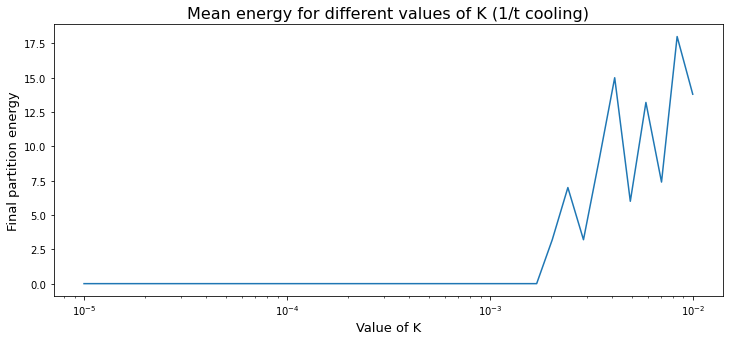

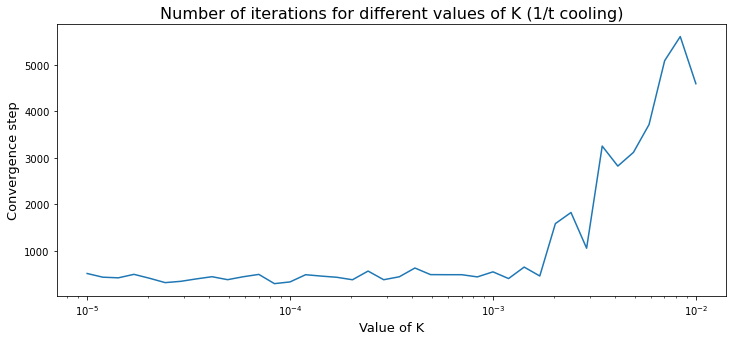

In [6]:
n_repeat = 20
cooling_scheme = 'T0/(1+t)'
convergence_step = list(np.zeros(n_repeat))
convergence_energy = list(np.zeros(n_repeat))
k_values = np.logspace(-5, -2, 40)
k_step_list_inv = []
k_energy_list_inv = []
for k in k_values:
    for j in range(n_repeat):
        current_partition = init_random_candidate(len(number_set))
        energy_list = []
        record_energy(compute_energy(number_set, current_partition), 
                      energy_list)
        current_partition = simulate_loop_annealing(number_set, 
                                                    MAX_ITER, 
                                                    temperature_init, 
                                                    cooling_scheme, 
                                                    k, 
                                                    current_partition, 
                                                    energy_list)
        convergence_step[j] = len(energy_list)
        convergence_energy[j] = energy_list[-1]
    k_step_list_inv.append(np.mean(convergence_step))
    k_energy_list_inv.append(np.mean(convergence_energy))

plt.figure(figsize=(12,5))
plt.semilogx(k_values, k_energy_list_inv)
plt.xlabel('Value of K', fontsize=13)
plt.ylabel('Final partition energy', fontsize=13)
plt.title('Mean energy for different values of K (1/t cooling)', fontsize=16)
plt.show()

plt.figure(figsize=(12,5))
plt.semilogx(k_values, k_step_list_inv)
plt.xlabel('Value of K', fontsize=13)
plt.ylabel('Convergence step', fontsize=13)
plt.title('Number of iterations for different values of K (1/t cooling)', 
          fontsize=16)
plt.show()

We then plot the final energy and the number fo iteration needed for convergence for $T\propto\frac{1}{\sqrt{kt+1}}$.

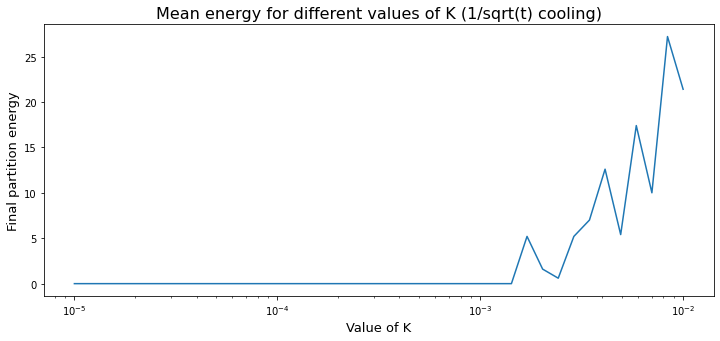

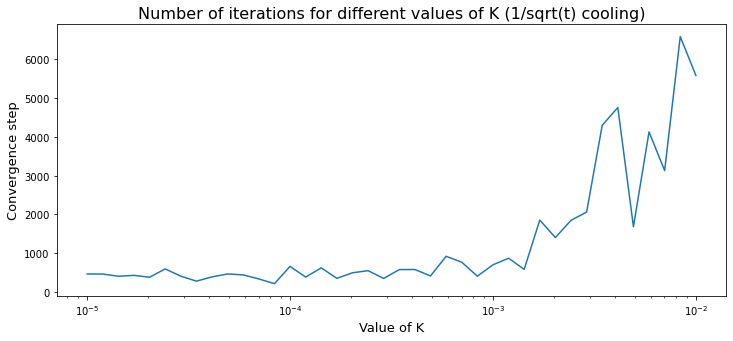

In [7]:
n_repeat = 20
cooling_scheme = 'T0/sqrt(1+t)'
convergence_step = list(np.zeros(n_repeat))
convergence_energy = list(np.zeros(n_repeat))
k_values = np.logspace(-5, -2, 40)
k_step_list_sqrt = []
k_energy_list_sqrt = []
for k in k_values:
    for j in range(n_repeat):
        current_partition = init_random_candidate(len(number_set))
        energy_list = []
        record_energy(compute_energy(number_set, current_partition), 
                      energy_list)
        current_partition = simulate_loop_annealing(number_set, 
                                                    MAX_ITER, 
                                                    temperature_init, 
                                                    cooling_scheme, 
                                                    k, 
                                                    current_partition, 
                                                    energy_list)
        convergence_step[j] = len(energy_list)
        convergence_energy[j] = energy_list[-1]
    k_step_list_sqrt.append(np.mean(convergence_step))
    k_energy_list_sqrt.append(np.mean(convergence_energy))

plt.figure(figsize=(12,5))
plt.semilogx(k_values, k_energy_list_sqrt)
plt.xlabel('Value of K', fontsize=13)
plt.ylabel('Final partition energy', fontsize=13)
plt.title('Mean energy for different values of K (1/sqrt(t) cooling)', fontsize=16)
plt.show()

plt.figure(figsize=(12,5))
plt.semilogx(k_values, k_step_list_sqrt)
plt.xlabel('Value of K', fontsize=13)
plt.ylabel('Convergence step', fontsize=13)
plt.title('Number of iterations for different values of K (1/sqrt(t) cooling)', 
          fontsize=16)
plt.show()

Finally, we plot the final energy and the number fo iteration needed for convergence for $T\propto e^{-t}$.

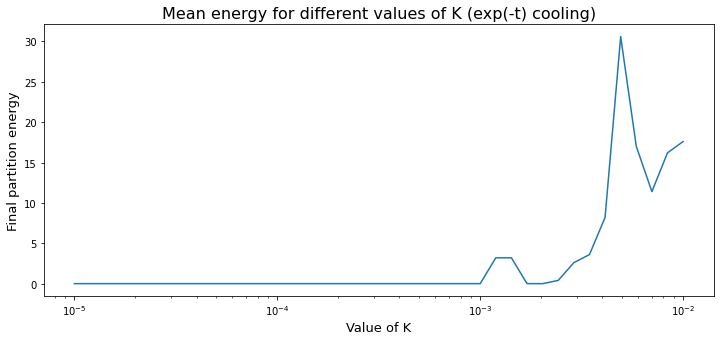

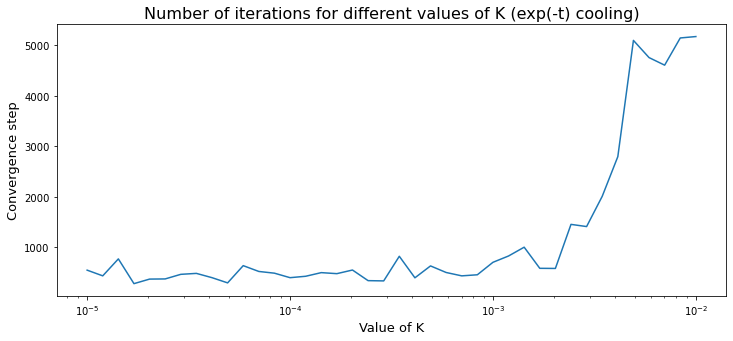

In [8]:
n_repeat = 20
cooling_scheme = 'T0exp(-t)'
convergence_step = list(np.zeros(n_repeat))
convergence_energy = list(np.zeros(n_repeat))
k_values = np.logspace(-5, -2, 40)
k_step_list_exp = []
k_energy_list_exp = []
for k in k_values:
    for j in range(n_repeat):
        current_partition = init_random_candidate(len(number_set))
        energy_list = []
        record_energy(compute_energy(number_set, current_partition), 
                      energy_list)
        current_partition = simulate_loop_annealing(number_set, 
                                                    MAX_ITER, 
                                                    temperature_init, 
                                                    cooling_scheme, 
                                                    k, 
                                                    current_partition, 
                                                    energy_list)
        convergence_step[j] = len(energy_list)
        convergence_energy[j] = energy_list[-1]
    k_step_list_exp.append(np.mean(convergence_step))
    k_energy_list_exp.append(np.mean(convergence_energy))

plt.figure(figsize=(12,5))
plt.semilogx(k_values, k_energy_list_exp)
plt.xlabel('Value of K', fontsize=13)
plt.ylabel('Final partition energy', fontsize=13)
plt.title('Mean energy for different values of K (exp(-t) cooling)', fontsize=16)
plt.show()

plt.figure(figsize=(12,5))
plt.semilogx(k_values, k_step_list_exp)
plt.xlabel('Value of K', fontsize=13)
plt.ylabel('Convergence step', fontsize=13)
plt.title('Number of iterations for different values of K (exp(-t) cooling)', 
          fontsize=16)
plt.show()

We plot them side by side to get a good idea of the differences.

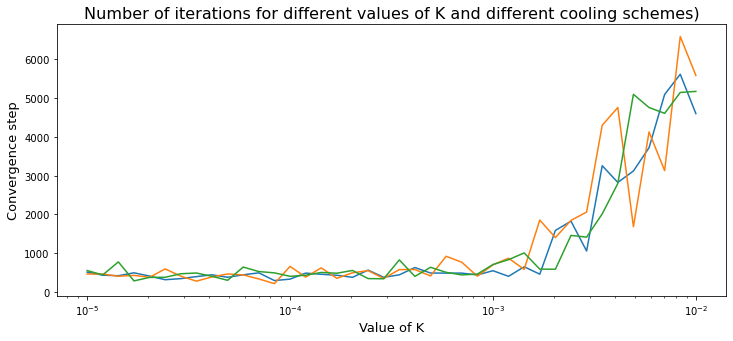

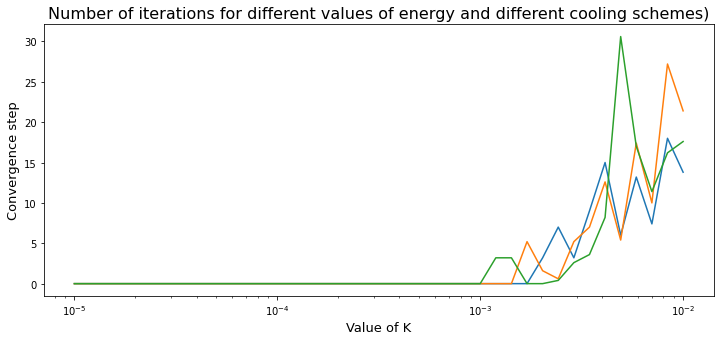

In [13]:
plt.figure(figsize=(12,5))
plt.semilogx(k_values, k_step_list_inv, label='T0/(1+t)')
plt.semilogx(k_values, k_step_list_sqrt, label='T0/sqrt(1+t)')
plt.semilogx(k_values, k_step_list_exp, label='T0exp(-t)')
plt.xlabel('Value of K', fontsize=13)
plt.ylabel('Convergence step', fontsize=13)
plt.title('Number of iterations for different values of K and different cooling schemes)', 
          fontsize=16)
plt.show()

plt.figure(figsize=(12,5))
plt.semilogx(k_values, k_energy_list_inv, label='T0/(1+t)')
plt.semilogx(k_values, k_energy_list_sqrt, label='T0/sqrt(1+t)')
plt.semilogx(k_values, k_energy_list_exp, label='T0exp(-t)')
plt.xlabel('Value of K', fontsize=13)
plt.ylabel('Convergence step', fontsize=13)
plt.title('Number of iterations for different values of energy and different cooling schemes)', 
          fontsize=16)
plt.show()

All three cooling schemes used show good convergence for any choice of K. This is explained by the fact that k is related to the speed at which the temperature decreases (the lower the k, the longer it takes to cool down)

We also plot the final energy and number of iterations until convergence for different intial temperatures.

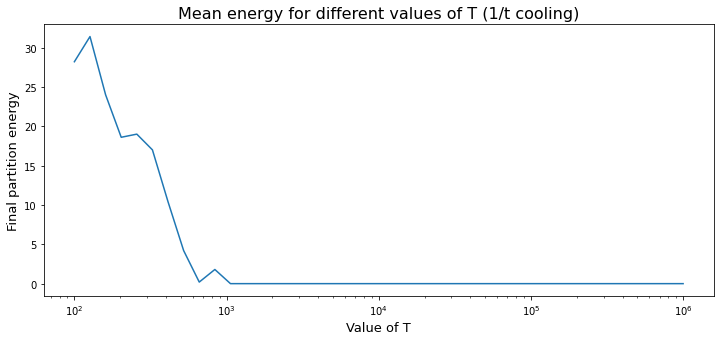

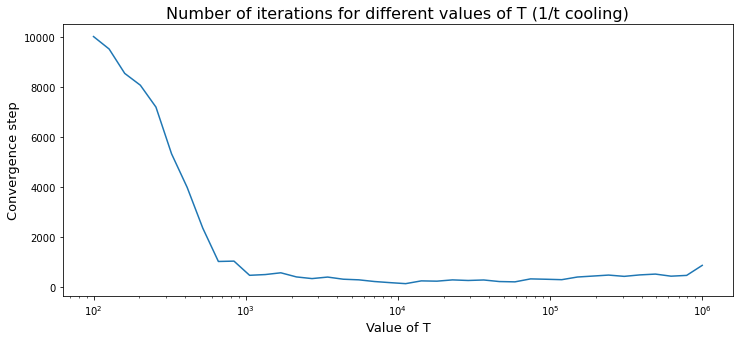

In [10]:
n_repeat = 20
cooling_scheme = 'T0/(1+t)'
convergence_step = list(np.zeros(n_repeat))
convergence_energy = list(np.zeros(n_repeat))
k = 0.001
T_values = np.logspace(2, 6, 40)
T_step_list = []
T_energy_list = []
for temperature_init in T_values:
    for j in range(n_repeat):
        current_partition = init_random_candidate(len(number_set))
        energy_list = []
        record_energy(compute_energy(number_set, current_partition), 
                      energy_list)
        current_partition = simulate_loop_annealing(number_set, 
                                                    MAX_ITER, 
                                                    temperature_init, 
                                                    cooling_scheme, 
                                                    k, 
                                                    current_partition, 
                                                    energy_list)
        convergence_step[j] = len(energy_list)
        convergence_energy[j] = energy_list[-1]
    T_step_list.append(np.mean(convergence_step))
    T_energy_list.append(np.mean(convergence_energy))

plt.figure(figsize=(12,5))
plt.semilogx(T_values, T_energy_list)
plt.xlabel('Value of T', fontsize=13)
plt.ylabel('Final partition energy', fontsize=13)
plt.title('Mean energy for different values of T (1/t cooling)', fontsize=16)
plt.show()

plt.figure(figsize=(12,5))
plt.semilogx(T_values, T_step_list)
plt.xlabel('Value of T', fontsize=13)
plt.ylabel('Convergence step', fontsize=13)
plt.title('Number of iterations for different values of T (1/t cooling)', 
          fontsize=16)
plt.show()

In the end we observe that for a well chosen set of parameters, the algorithm converges to the expected global minimum.

One last process to test is the convergence to a global minimum that may not be $E=0$. To this extent, we define a random set of numbers, therefore the minimum may not exist.

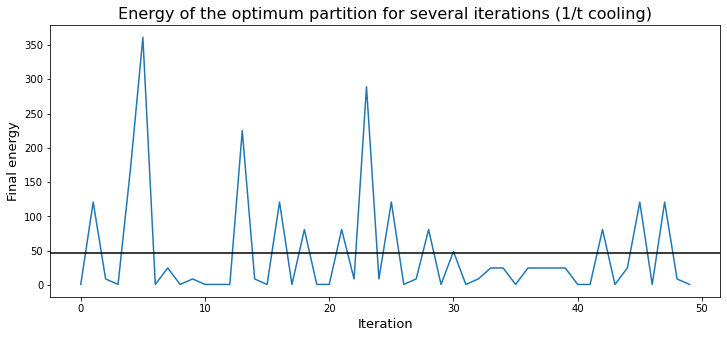

In [23]:
n_rep = 50
temperature_init = 1000
k = 0.001
cooling_scheme = 'T0/(1+t)'
number_set = list(np.random.randint(low=5,high=100,size=1000))
energy_list_opt = []

for i in range(n_rep):
    current_partition = init_random_candidate(len(number_set))
    energy_list = []
    record_energy(compute_energy(number_set, current_partition), energy_list)
    current_partition = simulate_loop_annealing(number_set, MAX_ITER, temperature_init, cooling_scheme, k, current_partition, energy_list)
    energy_list_opt.append(energy_list[-1])
    
plt.figure(figsize=(12,5))
plt.plot(range(n_rep), energy_list_opt)
plt.xlabel('Iteration', fontsize=13)
plt.ylabel('Final energy', fontsize=13)
plt.title('Energy of the optimum partition for several iterations (1/t cooling)', 
          fontsize=16)
plt.axhline(np.mean(energy_list_opt), color='k', linestyle='-')
plt.show()

In the end, the results obtained are quite good and the partitions have reasonably low energy.

The main issue with that type of partitionning problem is that finding what the minimum is would be as hard as solving the problem itself.

## Comments

Overall, the results shown here are reasonable, and we manage to solve the partitionning problem for a good number of cases when choosing the right parameters.

Further improvements could be made to improve the performances of the program. For instance, other cooling schedules could be explored to change the way the process evolves. This could ensure better convergence towards the optimal solution but at the cost of higher computing time. One could also modify the cost function to add other terms in the Hamiltonian in order to refine the search process.